<a href="https://colab.research.google.com/github/MarcM987/test-assignment-MarcM987/blob/main/Copy_of_DATA_301_Lab_1B_Marc_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

In [1]:
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/export?format=csv&gid=970845822"
#url_1 = sheet_url.replace('/edit#gid=', 'export?format=csv&gid=')
df_data301 = pd.read_csv(sheet_url)
df_data301

,What is your major?,Where are you living this quarter?,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?
0,Other,"Off Campus, but in SLO",2,Light Blue,Criminal Minds,5.000000e+05,No,Yes,Yes
1,Statistics,"Off Campus, outside of SLO",5,green,A Gentleman in Moscow,9.300000e+05,No,No,No
2,Computer Science,"Off Campus, but in SLO",2,blue,Crescent City by Sarah J Maas,1.000000e+07,Yes,No,Yes
3,Other,"Off Campus, outside of SLO",2,Green,The Institute by Stephen King,4.000000e+05,No,No,Yes
4,Computer Science,"Off Campus, outside of SLO",1,Blue/Indigo,Peaky Blinders,1.000000e+05,Yes,Yes,No
5,Other,"Off Campus, but in SLO",1,red,Into Thin Air by Jon Krakauer,1.000000e+04,Yes,No,No
6,Statistics,"Off Campus, but in SLO",1,blue,Queen's Gambit,1.083623e+06,Yes,Yes,Yes
7,Statistics,"Off Campus, but in SLO",2,Purple,The Mandalorian,6.250000e+05,No,No,Yes
8,Computer Science,"Off Campus, but in SLO",1,purple,The Queen's Gambit,1.000000e+06,Yes,Yes,No
9,Statistics,"Off Campus, outside of SLO",1,Purple,Wolf Children,9.200000e+03,No,No,No


## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

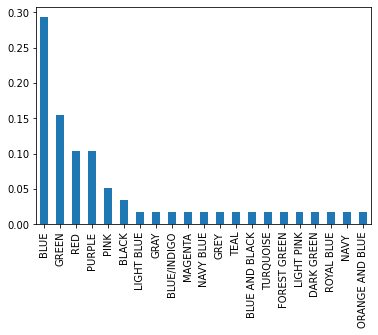

In [33]:
# TYPE YOUR CODE HERE.
#str.upper to correct capitalization differences (green != Green, GREEN==GREEN)
data301_fav_color = df_data301['What is your favorite color?'].astype('string').str.upper()
data301_fav_color.value_counts(normalize=True).plot.bar()

**TYPE YOUR WRITTEN EXPLANATION HERE.**

The data itself shows that common general colors are more commonly listed as people's favorite with more specific colors or color combinations are favored less.

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

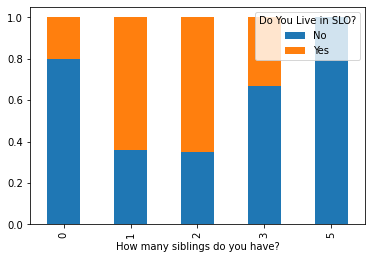

In [68]:
# TYPE YOUR CODE HERE.
def live_to_slo(c):
  if c in ["Off Campus, but in SLO", "On-Campus housing"]:
    return "Yes"
  else:
    return "No"

df_data301["Do You Live in SLO?"] = df_data301["Where are you living this quarter?"].map(live_to_slo)
joint_sib_slo = pd.crosstab(df_data301["How many siblings do you have?"], 
                      df_data301["Do You Live in SLO?"], 
                      normalize=True)

sib = joint_sib_slo.sum(axis=1)
cond_sib_slo = joint_sib_slo.T/sib # had to transpose due to dimensions
cond_sib_slo.T.plot.bar(stacked=True) # transpose back for clarity & format

**TYPE YOUR WRITTEN EXPLANATION HERE.**

There does seem to be a relationship between the number of siblings and whether or not they live in SLO. The visualization above shows that those with 1 or 2 siblings are more likely to live in SLO while those with 0, 3, or 5 tend to live outside of SLO. The overall trend from 0-5 siblings tends to show that those near the median number of siblings are more likely to live in SLO than those near the min or max of siblings.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

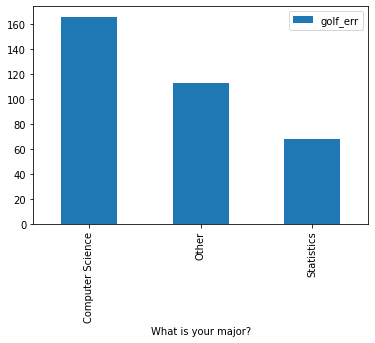

In [99]:
# TYPE YOUR CODE HERE.
# Correct Number of Golf Balls = 884520
df_data301["golf_err"] = ((df_data301[df_data301.columns[[5]]]-884520)*100/884520).abs()
df_golf_majors = df_data301[["What is your major?", "golf_err"]]
major_err = df_golf_majors.groupby("What is your major?", as_index=False)["golf_err"].mean()
major_err.set_index("What is your major?").plot.bar()


**TYPE YOUR WRITTEN EXPLANATION HERE.**

The category of major seemed perhaps the most likely category that might affect the golf guess, as perhaps education might aid in an educated guess. Then, after calculating the %error of the guesses, grouping the averaged %error by major started to demonstrate a noticeable relationship. By the visualization of this grouping, it is apparent that Statistics had the lowest average %error in their golf guesses than the other majors while Computer Science had the highest average %error with other falling inbetween. 

## Question 4

Write and answer your own question using this data set.

Is there a notable relationship between a students' Major and their enjoyment of video games?

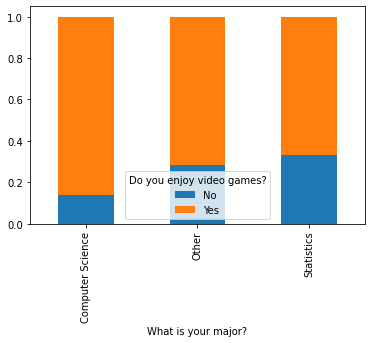

In [188]:
# TYPE YOUR CODE HERE.
df_major_games = df_data301[df_data301.columns[[0,7]]]

#probability sports and games by major
joint_major_games = pd.crosstab(df_data301["What is your major?"], 
            df_data301["Do you enjoy video games?"], normalize=True)
major = joint_major_games.sum(axis=1)
cond_major_games = joint_major_games.divide(major, axis=0)

#visualization
cond_major_games.plot.bar(stacked=True)

There seems to be a small relationship between a students major and whether or not they enjoy video games, but not strong one. While it does seem all majors enjoy video games in the majority and the differences in major compared with enjoyment of videos games are small, there does seem to be a noticably significant increase in video game enjoyment between in CS compared to STATS with Other majors appearing to fall aproximately centered between.